<a href="https://colab.research.google.com/github/los61013/kaggle-titanic/blob/main/Kaggle_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **鐵達尼號倖存者預測**

# 環境準備

**掛載硬碟**



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
import os

if not os.path.isdir("資料探勘"):
  os.makedirs("資料探勘")

In [ ]:
%cd 資料探勘/

/content/gdrive/MyDrive/資料探勘


# 程式碼


## 1. Import必要模組

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import display_html
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
print("Setup Complete")


Setup Complete


## 2. 資料讀取、前處理



*   設定資料路徑並讀取檢視




In [ ]:
#讀取資料路徑
test_data = pd.read_csv("/content/gdrive/MyDrive/資料探勘/titanic data/test.csv")
train_data = pd.read_csv("/content/gdrive/MyDrive/資料探勘/titanic data/train.csv")

#檢視資料
print(train_data.head())
print("train data:",train_data.shape)
print(test_data.head())
print("test data:",test_data.shape)

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
train data: (891, 11)
   pclass                                          name     sex   age  sibsp  \
0       3



*   資料合併(若需要儲存可用to_csv儲存合併後的檔案)



In [ ]:
#資料合併
alldata = train_data.append(test_data)
alldata.reset_index(inplace=True, drop=True)
#alldata.to_csv(save_path+'\\'+ save_name,encoding="utf_8_sig",index=False) #資料儲存
print(alldata.head())
print("alldata:", alldata.shape)

   survived  pclass                                               name  \
0       0.0       3                            Braund, Mr. Owen Harris   
1       1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2       1.0       3                             Heikkinen, Miss. Laina   
3       1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4       0.0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
alldata: (1309, 11)




*   檢視資料缺失



In [ ]:
all_data_miss = alldata.isnull().sum()
print(all_data_miss[1:11])
total_data = np.product(alldata.shape)
total_miss = all_data_miss[1:11].sum()
percent_miss = (total_miss / total_data) * 100
print("缺失數:", total_miss,"佔比:", percent_miss,"%")

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64
缺失數: 1280 佔比: 8.889506215709424 %


資料特徵包含:
*   survied:是否生存(0死1活)
*   pclass:艙等(1頭等2商務3經濟)
*   name:姓名
*   sex:性別
*   age:年齡
*   sibsp:船上有兄弟/配偶的數目 
*   parch:船上有父母/小孩的數目
*   ticket:船票編號
*   fare:船票價格
*   cabin:船艙編號
*   embarked:上船的岸口(C法國瑟堡Q英國皇后鎮S英國南安普頓)








## 3.   特徵觀察


* 性別生存率

,sex,survived
0,female,0.742038
1,male,0.188908


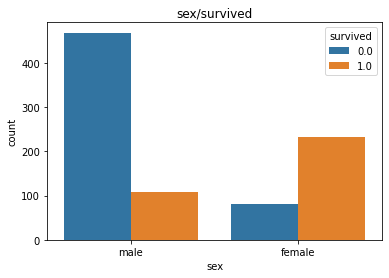

In [ ]:
plt.figure(num=1)
plt.title("sex/survived")
sn.countplot(x= alldata['sex'], hue=alldata['survived'])
display(alldata[["sex", "survived"]].groupby(['sex'], as_index=False).mean())

* 艙等存活率

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


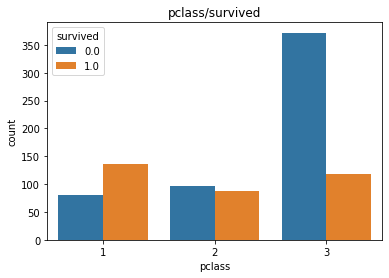

In [ ]:
#艙等存活率
plt.figure(num=2)
plt.title("pclass/survived")
sn.countplot(x=alldata['pclass'], hue=alldata['survived'])
display(alldata[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean())

* 性別與艙等存活率


In [ ]:
#性別與艙等存活率
display(alldata[['pclass', 'sex', 'survived']].groupby(['pclass', 'sex'], as_index=False).mean().sort_values(by='survived', ascending=False))

,pclass,sex,survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


* 艙等/票價 存活率

fare        
survived    0.0     1.0
pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

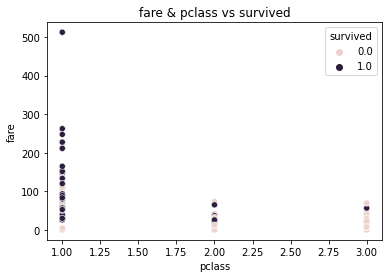

In [ ]:
#艙等/票價 存活率
plt.figure(num=3)
plt.title("fare & pclass vs survived")
#alldata['logfare'] = (alldata['fare']+1).map(lambda x : np.log10(x) if x > 0 else 0) #取log
#sn.boxplot(x=alldata['fare'],y=alldata['pclass'],hue=alldata['survived'],orient='h',palette="Set3")
sn.scatterplot(x=alldata['pclass'], y=alldata['fare'], hue=alldata['survived'])
display(pd.pivot_table(alldata, values=['fare'], index=['pclass'], columns=['survived'], aggfunc='median').round(3))

* 上船港口存活率

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


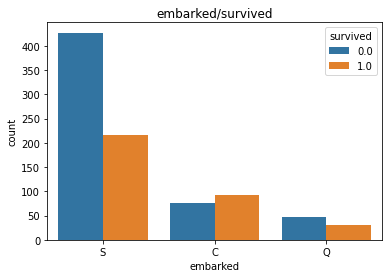

In [ ]:
#上船港口存活率
plt.figure(num=4)
plt.title("embarked/survived")
sn.countplot(x=alldata['embarked'], hue=alldata['survived'])
display(alldata[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean())

* 上船口艙等

,embarked,pclass
0,C,1.851852
1,Q,2.894309
2,S,2.347921


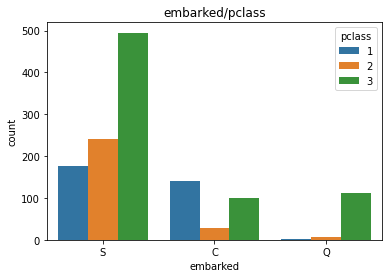

In [ ]:
#上船口艙等
plt.figure(num=5)
plt.title("embarked/pclass")
sn.countplot(x=alldata['embarked'], hue=alldata['pclass'])
display(alldata[['embarked', 'pclass']].groupby(['embarked'], as_index=False).mean())

* 姓名長度存活率

,namelen,survived
0,3,0.291803
1,4,0.341902
2,5,0.427083
3,6,0.769231
4,7,0.842105
5,8,0.555556
6,9,1.000000
7,14,1.000000


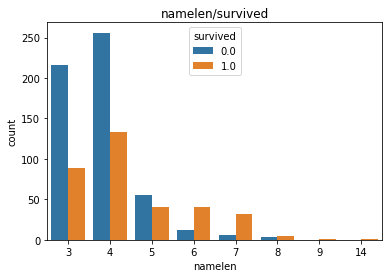

In [ ]:
#姓名長度存活率
namelen = []
for names in alldata['name']:
    namelen.append(len(names.split()))
alldata['namelen'] = namelen
plt.figure(num=6)
plt.title("namelen/survived")
sn.countplot(x=alldata['namelen'], hue=alldata['survived'])
display(alldata[['namelen', 'survived']].groupby(['namelen'], as_index=False).mean())

* 家庭人數存活率

,family,survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


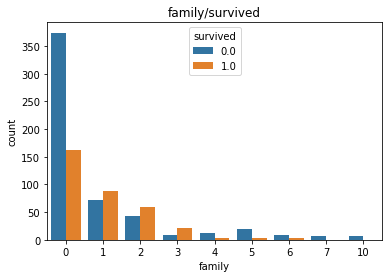

In [ ]:
#家庭人數存活率
plt.figure(num=7)
plt.title("family/survived")
alldata['family'] = alldata['sibsp']+alldata['parch']
sn.countplot(x=alldata['family'], hue=alldata['survived'])
display(alldata[['family', 'survived']].groupby(['family'], as_index=False).mean())

* 年齡特徵

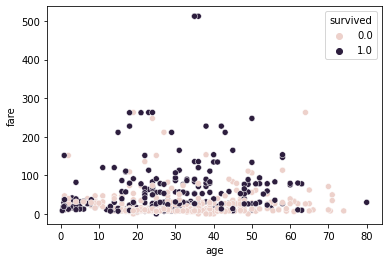

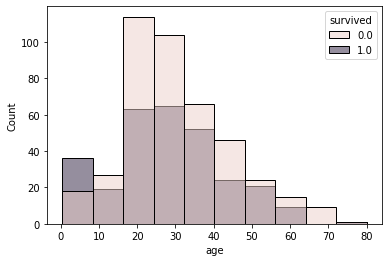

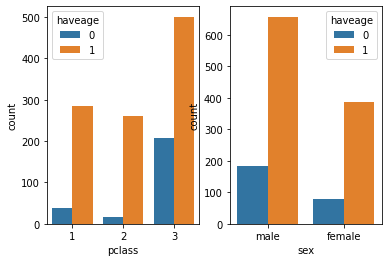

In [ ]:
#年齡特徵
plt.figure(num=8)
sn.scatterplot(x=alldata['age'], y=alldata['fare'], hue=alldata['survived'])
plt.figure(num=9)
sn.histplot(x=alldata['age'], hue=alldata['survived'], bins=10)
alldata['haveage'] = alldata['age'].isnull().map(lambda x: 0 if x == True else 1)
fig, [ax1,ax2] = plt.subplots(1, 2)
ax1 = sn.countplot(x=alldata['pclass'], hue=alldata['haveage'],ax=ax1)
ax2 = sn.countplot(x=alldata['sex'], hue=alldata['haveage'],ax=ax2)

* 年齡特徵

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


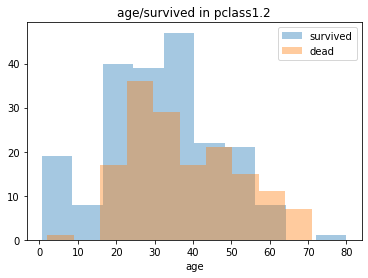

In [ ]:
haveage_s = ((alldata['haveage'] == 1) & (alldata['pclass'] != 3) & (alldata['survived'] == 1))
haveage_d = ((alldata['haveage'] == 1) & (alldata['pclass'] != 3) & (alldata['survived'] == 0))
fig, ax = plt.subplots()
plt.title("age/survived in pclass1.2")
ax = sn.distplot(alldata.loc[haveage_s, 'age'], kde=False, bins=10, label='survived')
ax = sn.distplot(alldata.loc[haveage_d, 'age'], kde=False, bins=10, label='dead')
ax.legend()

## 4. 資料清洗

將空欄位依照剛剛觀察到的特性進行填值

In [ ]:
#年齡依照稱謂的平均值填值
alldata['title'] = alldata['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
alldata['title'] = alldata['title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Dona', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Rare')
alldata['title'] = alldata['title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
alldata['title'] = alldata['title'].replace(['Lady'], 'Mrs')
alldata['title'] = alldata['title'].map({"Mr":0, "Rare":1, "Master":2, "Miss":3, "Mrs":4})
meamage = alldata.groupby('title')['age'].median()
for i in range(0,5):
    alldata.loc[(alldata['age'].isnull()) & (alldata['title'] == i), 'age'] = meamage[i]

#姓名欄改為姓名長度
alldata['name'] = alldata['namelen'] 

#性別欄改為0和1(0女1男)
alldata["sex"] = [1 if i == "male" else 0 for i in alldata["sex"]]

#票價空值用平均數填值並取log
alldata["fare"] = alldata["fare"].fillna(alldata["fare"].mean())
alldata['fare'] = (alldata['fare']+1).map(lambda x : np.log10(x) if x>0 else 0)

#登船口改為0、1、2(0:S、1:Q、2:C)並將空值填為0(S)
alldata["embarked"] = [0 if i == "S" else i for i in alldata["embarked"]]
alldata["embarked"] = [1 if i == "Q" else i for i in alldata["embarked"]]
alldata["embarked"] = [2 if i == "C" else i for i in alldata["embarked"]]
alldata["embarked"] = alldata["embarked"].fillna(0)

#將不要的特徵切掉
alldata = alldata.drop('cabin',axis=1)
alldata = alldata.drop('ticket',axis=1)
alldata = alldata.drop('haveage',axis=1)
alldata = alldata.drop('parch',axis=1)
alldata = alldata.drop('sibsp',axis=1)
alldata = alldata.drop('namelen',axis=1)

#檢視資料
print(alldata.head())
all_data_miss = alldata.isnull().sum()
print(all_data_miss[1:15])

   survived  pclass  name  sex   age      fare  embarked  family  title
0       0.0       3     4    1  22.0  0.916454       0.0       1      0
1       1.0       1     7    0  38.0  1.859038       2.0       1      4
2       1.0       3     3    0  26.0  0.950608       0.0       0      3
3       1.0       1     7    0  35.0  1.733197       0.0       1      4
4       0.0       3     4    1  35.0  0.956649       0.0       0      0
pclass      0
name        0
sex         0
age         0
fare        0
embarked    0
family      0
title       0
dtype: int64


          survived    pclass      name       sex       age    family  \
survived  1.000000 -0.338481  0.276512 -0.543351 -0.070677  0.016639   
pclass   -0.338481  1.000000 -0.257902  0.124617 -0.391870  0.050027   
name      0.276512 -0.257902  1.000000 -0.401644  0.131479  0.196947   
sex      -0.543351  0.124617 -0.401644  1.000000  0.059747 -0.188583   
age      -0.070677 -0.391870  0.131479  0.059747  1.000000 -0.211435   
family    0.016639  0.050027  0.196947 -0.188583 -0.211435  1.000000   
fare      0.329862 -0.685333  0.281604 -0.249907  0.186800  0.381462   
embarked  0.167675 -0.185479  0.000610 -0.097960  0.059096 -0.067598   
title     0.567132 -0.132502  0.493188 -0.945345 -0.092112  0.290957   

              fare  embarked     title  
survived  0.329862  0.167675  0.567132  
pclass   -0.685333 -0.185479 -0.132502  
name      0.281604  0.000610  0.493188  
sex      -0.249907 -0.097960 -0.945345  
age       0.186800  0.059096 -0.092112  
family    0.381462 -0.067598  0.2

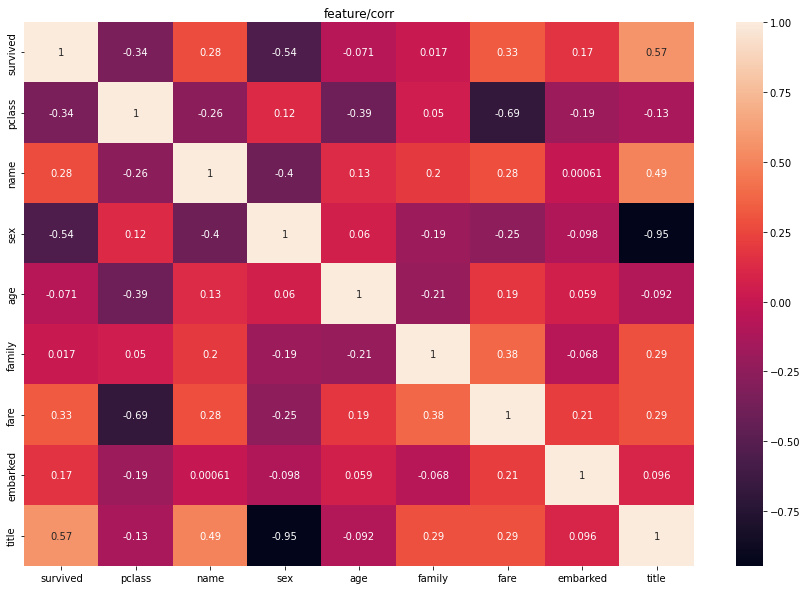

In [ ]:
#特徵相關熱點圖
cols = ['survived', 'pclass', 'name', 'sex', 'age', 'family', 'fare', 'embarked','title']
alldata_corr = alldata[cols].corr()
print(alldata_corr)
plt.figure(num=12,figsize=[15,10])

plt.title("feature/corr")
sn.heatmap(alldata_corr,annot=True)

## 5. 帶入各模型並計算準確度(依準確度高低決定之後要優化的模型)




In [ ]:
#獨立資料
Y_train = train_data['survived']
X_train = alldata.drop("survived", axis=1)
X_test = X_train.iloc[891:]
X_train = X_train.head(891)
print("ok")
print(X_test)
print(X_train)

ok
      pclass  name  sex   age      fare  embarked  family  title
891        3     3    1  34.5  0.945921       1.0       0      0
892        3     5    0  47.0  0.903090       0.0       1      4
893        2     4    1  62.0  1.028876       1.0       0      0
894        3     3    1  27.0  0.985090       0.0       0      0
895        3     6    0  22.0  1.123443       0.0       2      4
...      ...   ...  ...   ...       ...       ...     ...    ...
1304       3     3    1  29.0  0.956649       0.0       0      0
1305       1     5    0  39.0  2.040998       2.0       0      1
1306       3     4    1  38.5  0.916454       0.0       0      0
1307       3     3    1  29.0  0.956649       0.0       0      0
1308       3     4    1   4.0  1.368441       2.0       2      2

[418 rows x 8 columns]
     pclass  name  sex   age      fare  embarked  family  title
0         3     4    1  22.0  0.916454       0.0       1      0
1         1     7    0  38.0  1.859038       2.0       1      4
2

In [ ]:
#決策樹
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train), 3)
print(acc_decision_tree)

0.984


In [ ]:
#隨機森林
random_forest = RandomForestClassifier()#oob_score=True)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train), 3)
#oobscore = round(random_forest.oob_score_,3)
#print("oobscore:", oobscore)
print(acc_random_forest)

oobscore: 0.818
0.984


In [ ]:
#邏輯回歸
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train), 3)
print(acc_log)

0.828


In [ ]:
#SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train), 3)
print(acc_linear_svc)

0.532


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#perceptron
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train), 3)
print(acc_perceptron)

0.762


In [ ]:
#SGD
sgd = linear_model.SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train), 3)
print(acc_sgd)

0.811


In [ ]:
#貝式分類器
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train), 3)
print(acc_gaussian)

0.801


In [ ]:
results = pd.DataFrame({
    "model":["Support Vector Machines", "Logistic Regression", "Random Forest", "Naive Bayes", "Perceptron",
              "Stochastic Gradient Decent", "Decision Tree"],
    "acc":[acc_linear_svc, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd,
            acc_decision_tree]})
result = results.sort_values(by="acc", ascending=False)
result = result.set_index("acc")
print(result.head(9))

                            model
acc                              
0.984               Random Forest
0.984               Decision Tree
0.828         Logistic Regression
0.811  Stochastic Gradient Decent
0.801                 Naive Bayes
0.762                  Perceptron
0.532     Support Vector Machines


## 6. 交叉驗證



**K-Fold Cross Validation:**
* 將訓練數據隨機分成K個子集，稱為Folds。這裡將數據分成10個子集(K=10)。隨機森林模型會被訓練和評估10次，每次使用不同的子集進行測試，並在剩餘的9個子集上進行訓練。


In [ ]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring="accuracy")
print("Acc:", acc)
print("Mean:", acc.mean())
print("Standard Deviation:", acc.std())

Acc: [0.78888889 0.85393258 0.76404494 0.84269663 0.85393258 0.84269663
 0.82022472 0.76404494 0.85393258 0.80898876]
Mean: 0.819338327091136
Standard Deviation: 0.03439664568710531


## 7. 特徵觀察



In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances.head(9))

          importance
feature             
fare           0.226
age            0.200
title          0.176
sex            0.125
pclass         0.090
name           0.081
family         0.071
embarked       0.031


## 8. 超參數調整

**調整隨機森林內的參數讓分數上升**

*   criterion：選擇”gini”或“entropy”。選擇計算屬性的gini(基尼不純度)還是entropy(信息增益)，來選擇最合適的節點。

*   n_estimators：決策樹的個數（決策樹是建立一棵樹，隨機森林是建立一個森林，這個參數是設定這個森林裡要包含多少棵樹），越多越好，但是性能就會越差。n_estimators達到一定程度後，隨機森林的準確性不是上升，而是開始波動，並且n_estimators越大建立的樹越多，需要的運算量也越大，訓練的時間也會越長。

*   min_samples_split：至少有多少資料才能再分。

*   min_samples_leaf：分完至少有多少資料才能分。

*   oob_score：是否採用袋外樣本來評估模型的好壞。稱爲袋外數據(Out Of Bag,簡稱OOB)，這些數據沒有參與訓練集模型的擬合，因此可以用來檢測模型的適應性。

*   random_state：亂數種子。由於每次生成的樹都是不一樣的，所以用這個參數保證每次產生的樹一致。

In [ ]:
random_forest = RandomForestClassifier(criterion='gini', 
                n_estimators=100,
                min_samples_split=8,
                min_samples_leaf=2,
                oob_score=True,
                random_state=1,
                ) 
random_forest.fit(X_train, Y_train) 
Y_prediction = random_forest.predict(X_test) 
random_forest.score(X_train, Y_train)
oobscore = round(random_forest.oob_score_,3)
print("oobscore:", oobscore)

oobscore: 0.843


# 上傳kaggle

In [ ]:
#結果提交
submit['Survived'] = Y_prediction
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv(save_path+'\\'+ save_name,encoding="utf_8_sig",index=False)

結果:前21%

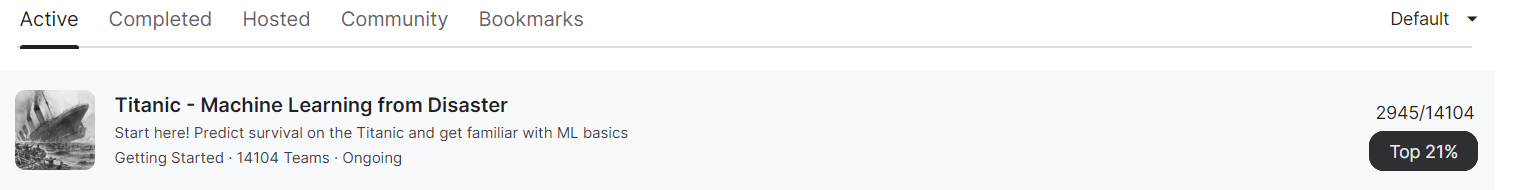